In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv("../data/raw/data.csv", encoding="utf-8-sig", header=1)
df.head()

df.info()
df.describe(include='all')





df.describe()


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numerical_cols].hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()



categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts(normalize=True).head()}\n")



plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


if 'FraudResult' in df.columns:
    sns.countplot(x='FraudResult', data=df)
    plt.title("FraudResult Distribution")
    plt.show()



📌 Data Overview:
        CustomerId  is_high_risk
0     CustomerId_1             1
1    CustomerId_10             1
2  CustomerId_1001             1
3  CustomerId_1002             0
4  CustomerId_1003             0 

🔎 Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    3742 non-null   object
 1   is_high_risk  3742 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.6+ KB
None 

📊 Summary Statistics:
            CustomerId  is_high_risk
count             3742   3742.000000
unique            3742           NaN
top     CustomerId_998           NaN
freq                 1           NaN
mean               NaN      0.383485
std                NaN      0.486300
min                NaN      0.000000
25%                NaN      0.000000
50%                NaN      0.000000
75%                NaN      1.00000

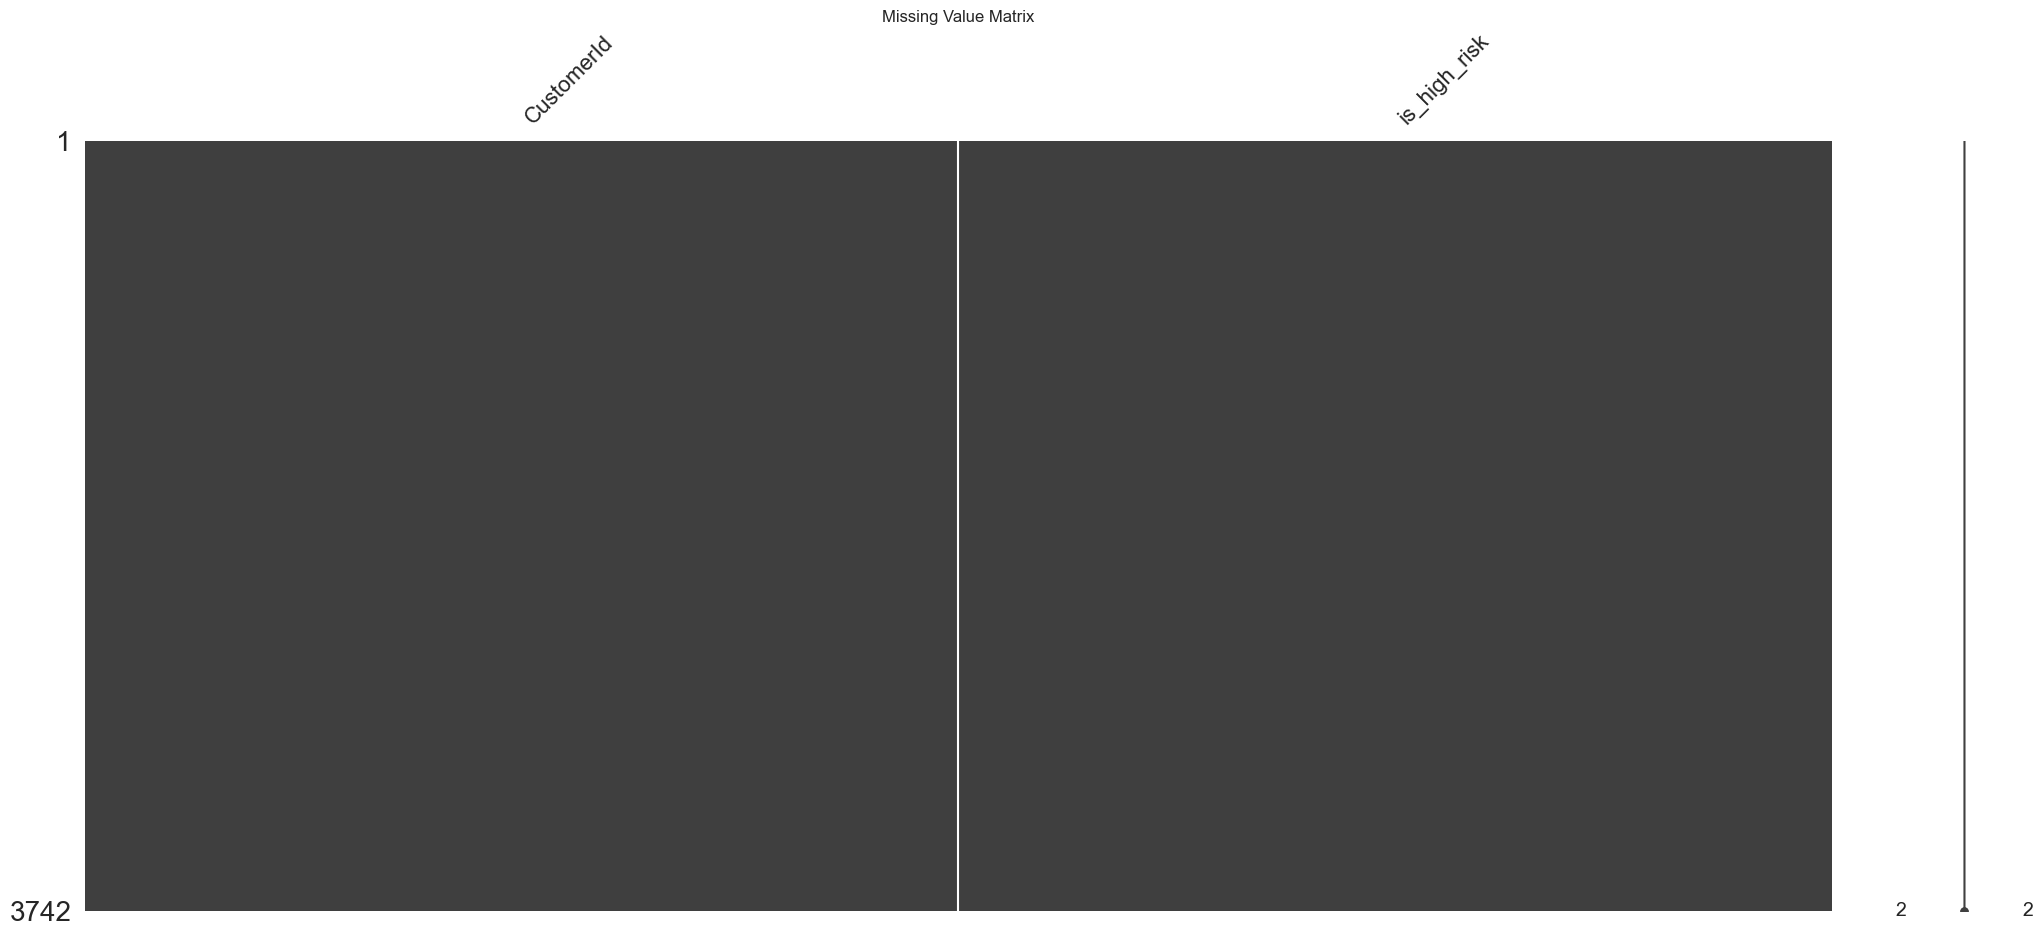

C:\Users\bezat\AppData\Local\Temp\ipykernel_33800\3997935132.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_high_risk", data=df, palette="Set2")


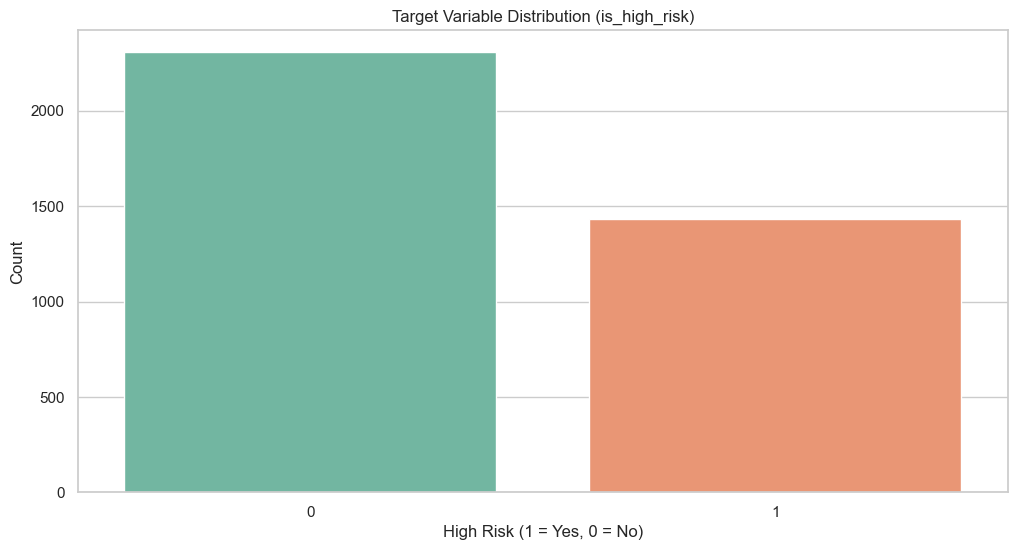

Not enough numeric columns found for pairplot.


C:\Users\bezat\AppData\Local\Temp\ipykernel_33800\3997935132.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="is_high_risk", y=col, palette="Set3")


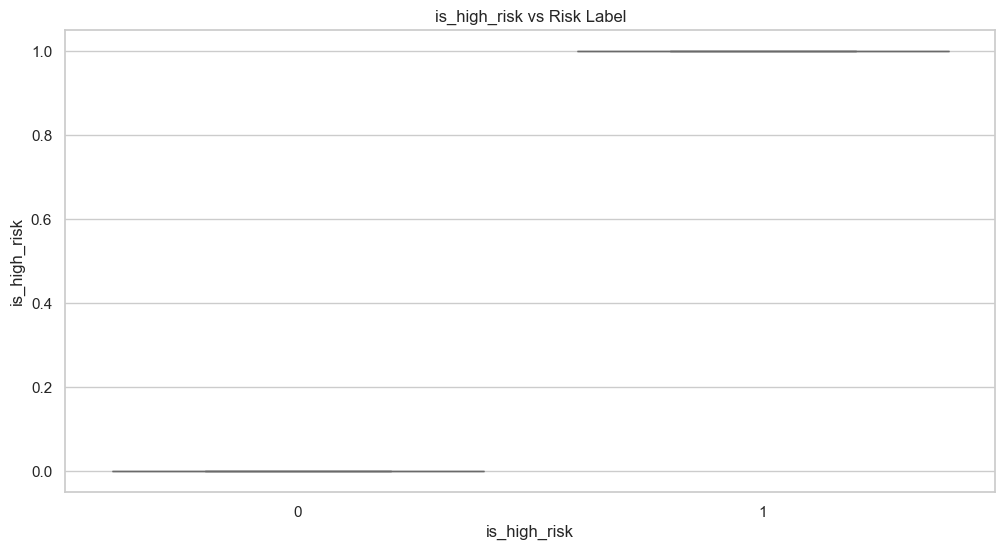

Value counts for 'CustomerId':
CustomerId
CustomerId_998     1
CustomerId_1       1
CustomerId_10      1
CustomerId_1001    1
CustomerId_1002    1
                  ..
CustomerId_1025    1
CustomerId_1022    1
CustomerId_1021    1
CustomerId_1020    1
CustomerId_1016    1
Name: count, Length: 3742, dtype: int64 

✅ EDA complete.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load data
df = pd.read_csv("../data/processed/high_risk_labels.csv", encoding="latin1")

# 1. Basic Info
print("📌 Data Overview:")
print(df.head(), "\n")
print("🔎 Data Types and Nulls:")
print(df.info(), "\n")
print("📊 Summary Statistics:")
print(df.describe(include="all"), "\n")

# 2. Missing Values
print("❓ Missing Values:")
print(df.isnull().sum())

msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

# 3. Target Distribution
sns.countplot(x="is_high_risk", data=df, palette="Set2")
plt.title("Target Variable Distribution (is_high_risk)")
plt.xlabel("High Risk (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

numeric_cols = df.select_dtypes(include=["number"]).copy()

# Step 2: Ensure 'is_high_risk' is included and exists
if "is_high_risk" in df.columns and "is_high_risk" not in numeric_cols.columns:
    numeric_cols["is_high_risk"] = df["is_high_risk"]

# Step 3: Plot safely if we have more than 1 numeric column
if numeric_cols.shape[1] > 1:
    sns.pairplot(numeric_cols, hue="is_high_risk", diag_kind="kde")
    plt.suptitle("Pairplot of Numeric Features by Risk Label", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns found for pairplot.")



# 6. Boxplots for distribution vs risk
for col in numeric_cols.columns:
    sns.boxplot(data=df, x="is_high_risk", y=col, palette="Set3")
    plt.title(f"{col} vs Risk Label")
    plt.show()

# 7. Frequency of categorical columns (if any)
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts(), "\n")

print("✅ EDA complete.")
